In [1]:
# clickhouse.ipynb

In [2]:
# https://stackoverflow.com/a/34058270
# https://stackoverflow.com/a/47378294

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } .end_space {height: 75vh;}</style>"))

In [3]:
# Set matplotlib backend
import matplotlib
matplotlib.use('nbagg')
# %matplotlib inline

In [4]:
# imports

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Inputs:
ch_log = '../bm_logs/clickhouse_bm_2019-02-23_14-43-27.log'
ch_log_aws = '../bm_logs/clickhouse_bm_aws_2019-02-24_00-55-35.log'
psql_log = '../bm_logs/postgresql_bm_2019-02-23_18-49-09.log'

In [6]:
def get_log_lines(file_name):
    with open(file_name, 'r') as read_file:
        lines = read_file.readlines()
    return lines

In [7]:
def get_query_times(lines):
    query_means = []
    query_stds = []
    for line in lines:
        if 'time elapsed' in line:
            perf_line_parts = line.split()
            query_means.append(np.around(float(perf_line_parts[0]), 2))
            query_stds.append(perf_line_parts[-2])
    return query_means, query_stds

In [8]:
ch_means, ch_stds = get_query_times(get_log_lines(ch_log))
psql_means, psql_stds = get_query_times(get_log_lines(psql_log))
ch_aws_means, ch_aws_stds = get_query_times(get_log_lines(ch_log_aws))

In [9]:
print(ch_means)
print(ch_stds)

[1.14, 3.5, 5.59, 8.33]
['0.24%', '0.04%', '0.06%', '0.02%']


In [10]:
print(ch_aws_means)
print(ch_aws_stds)

[3.64, 10.87, 17.41, 25.61]
['2.38%', '1.65%', '0.80%', '0.78%']


In [11]:
print(psql_means.extend([0, 0, 0]))
print(psql_stds.extend(['','','']))

None
None


In [12]:
print(psql_means)
print(psql_stds)

[201.67, 0, 0, 0]
['3.54%', '', '', '']


In [33]:
plt.style.use('default')

ind = np.arange(len(ch_means))
barw = 0.4

fig, ax = plt.subplots(figsize=(10, 6), dpi=100, edgecolor='black', facecolor=(.0, .0, .0, .0))
ch_bars = ax.bar(ind - barw/2, ch_means, barw, color='gold', label='ClickHouse_Local')
ch_aws_bars = ax.bar(ind + barw/2, ch_aws_means, barw, color='darkorange', label='ClickHouse_AWS')

ax.set_ylim(0, max(ch_aws_means + ch_means) + 10)
ax.set_title('Benchmarking ClickHouse', fontsize=20, verticalalignment='bottom')
ax.set_xlabel('Queries')
ax.set_ylabel('Time (sec)')
ax.set_xticks(ind)
ax.set_xticklabels(('Q1', 'Q2', 'Q3', 'Q4'))
ax.legend(loc='upper left')

In [34]:
def bartext(bars, stds):
    for bar, std in zip(bars, stds):
        width, height = bar.get_width(), bar.get_height()
        ax.text(bar.get_x() + width * 0.5, 1.01 * height, f'+- {std}', ha='center', va='bottom', fontsize=7)

<IPython.core.display.Javascript object>


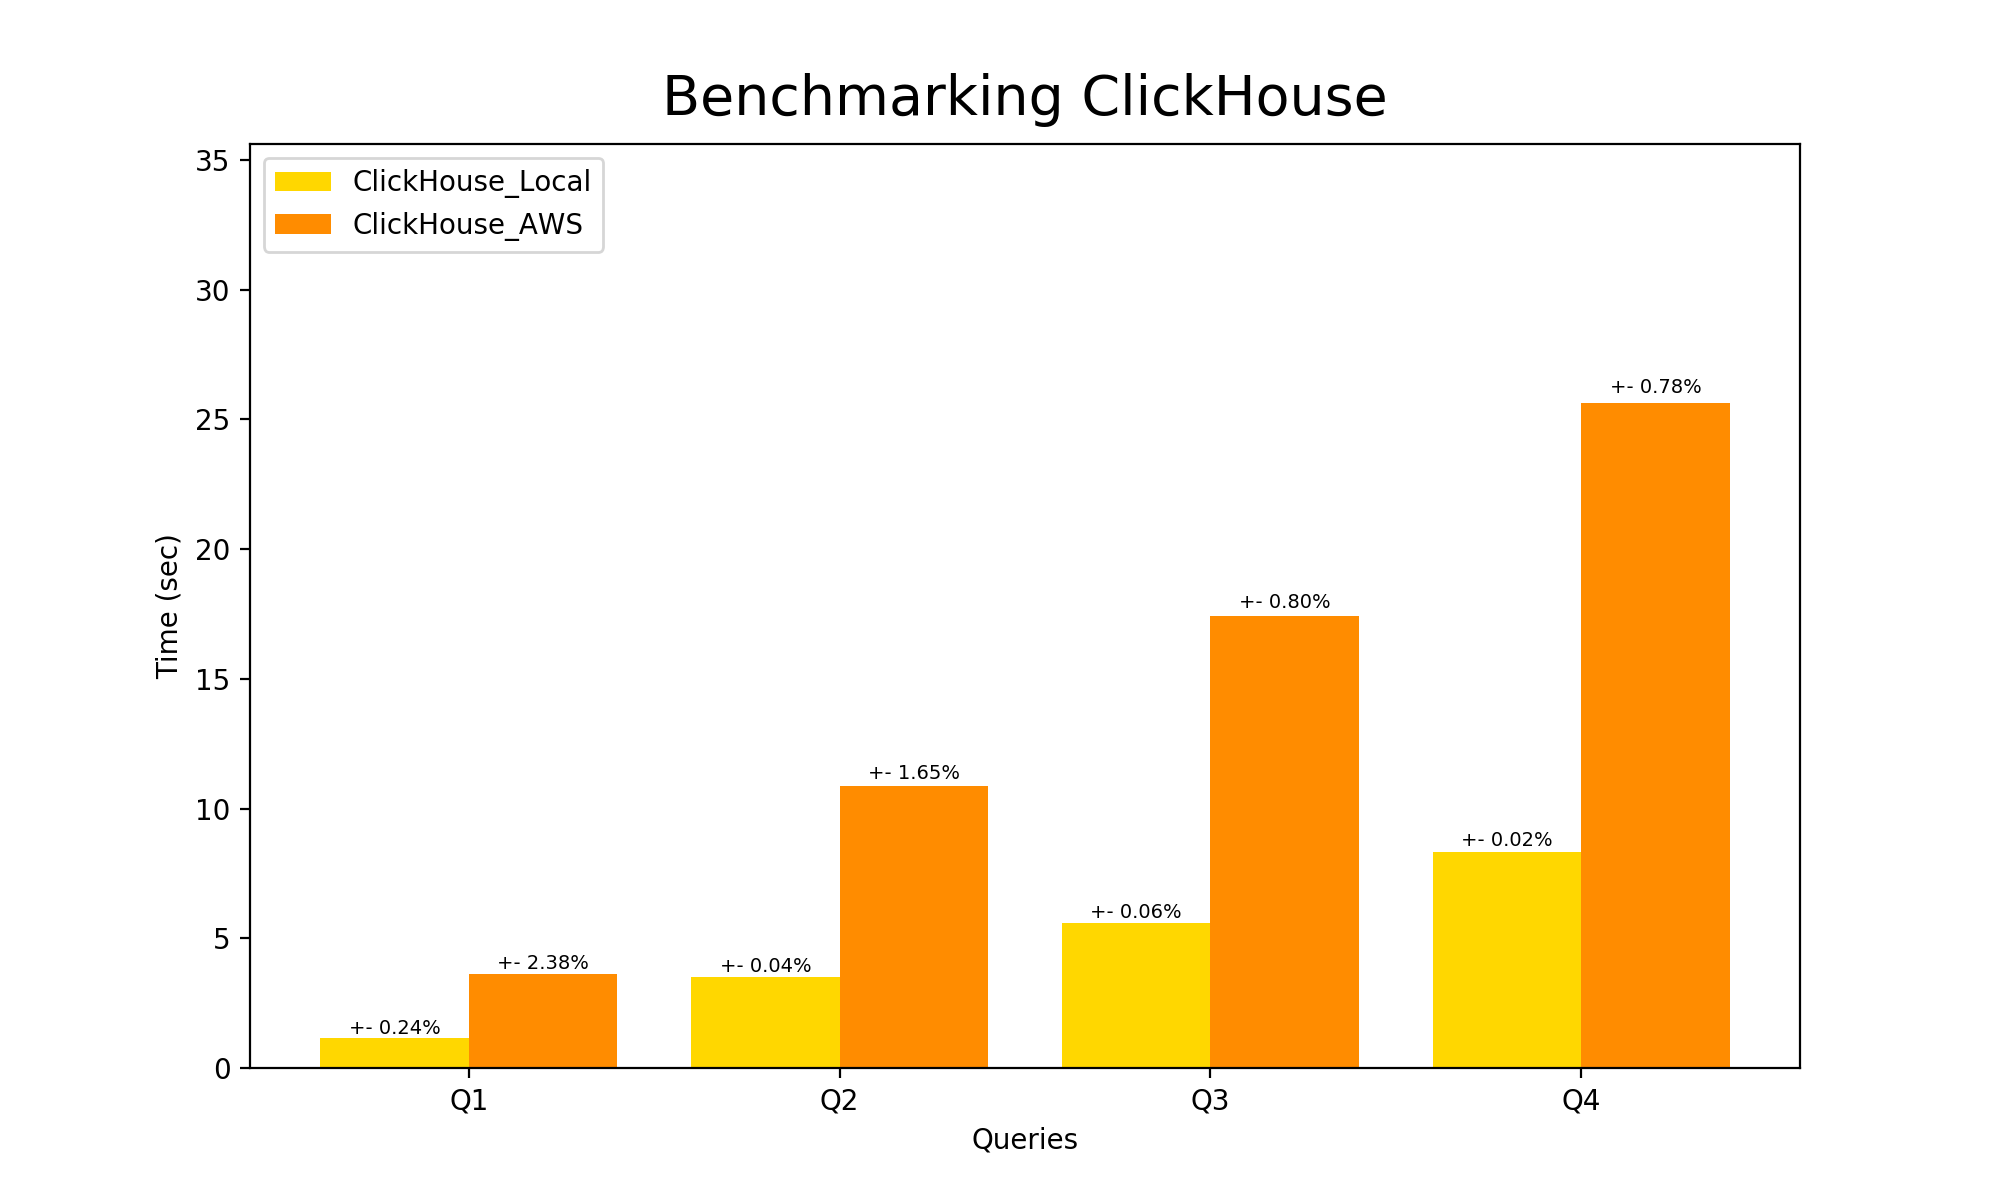

In [35]:
bartext(ch_bars, ch_stds)
bartext(ch_aws_bars, ch_aws_stds)
plt.show()

In [36]:
plt.style.use('default')

ind = np.arange(len(ch_means))
barw = 0.4

fig, ax = plt.subplots(figsize=(10, 6), dpi=100, edgecolor='black', facecolor=(.0, .0, .0, .0))
ch_bars = ax.bar(ind - barw/2, ch_means, barw, color='gold', label='ClickHouse')
psql_bars = ax.bar(ind + barw/2, psql_means, barw, color='steelblue', label='PostgreSQL')

ax.set_ylim(0, max(ch_means) + 10)
ax.set_title('Benchmarking ClickHouse', fontsize=20, verticalalignment='bottom')
ax.set_xlabel('Queries')
ax.set_ylabel('Time (sec)')
ax.set_xticks(ind)
ax.set_xticklabels(('Q1', 'Q2', 'Q3', 'Q4'))
ax.legend(loc='upper right')

In [37]:
def bartext(bars, stds):
    for bar, std in zip(bars, stds):
        width, height = bar.get_width(), bar.get_height()
        ax.text(bar.get_x() + width * 0.5, 1.01 * height, f'+- {std}', ha='center', va='bottom', fontsize=7)

<IPython.core.display.Javascript object>


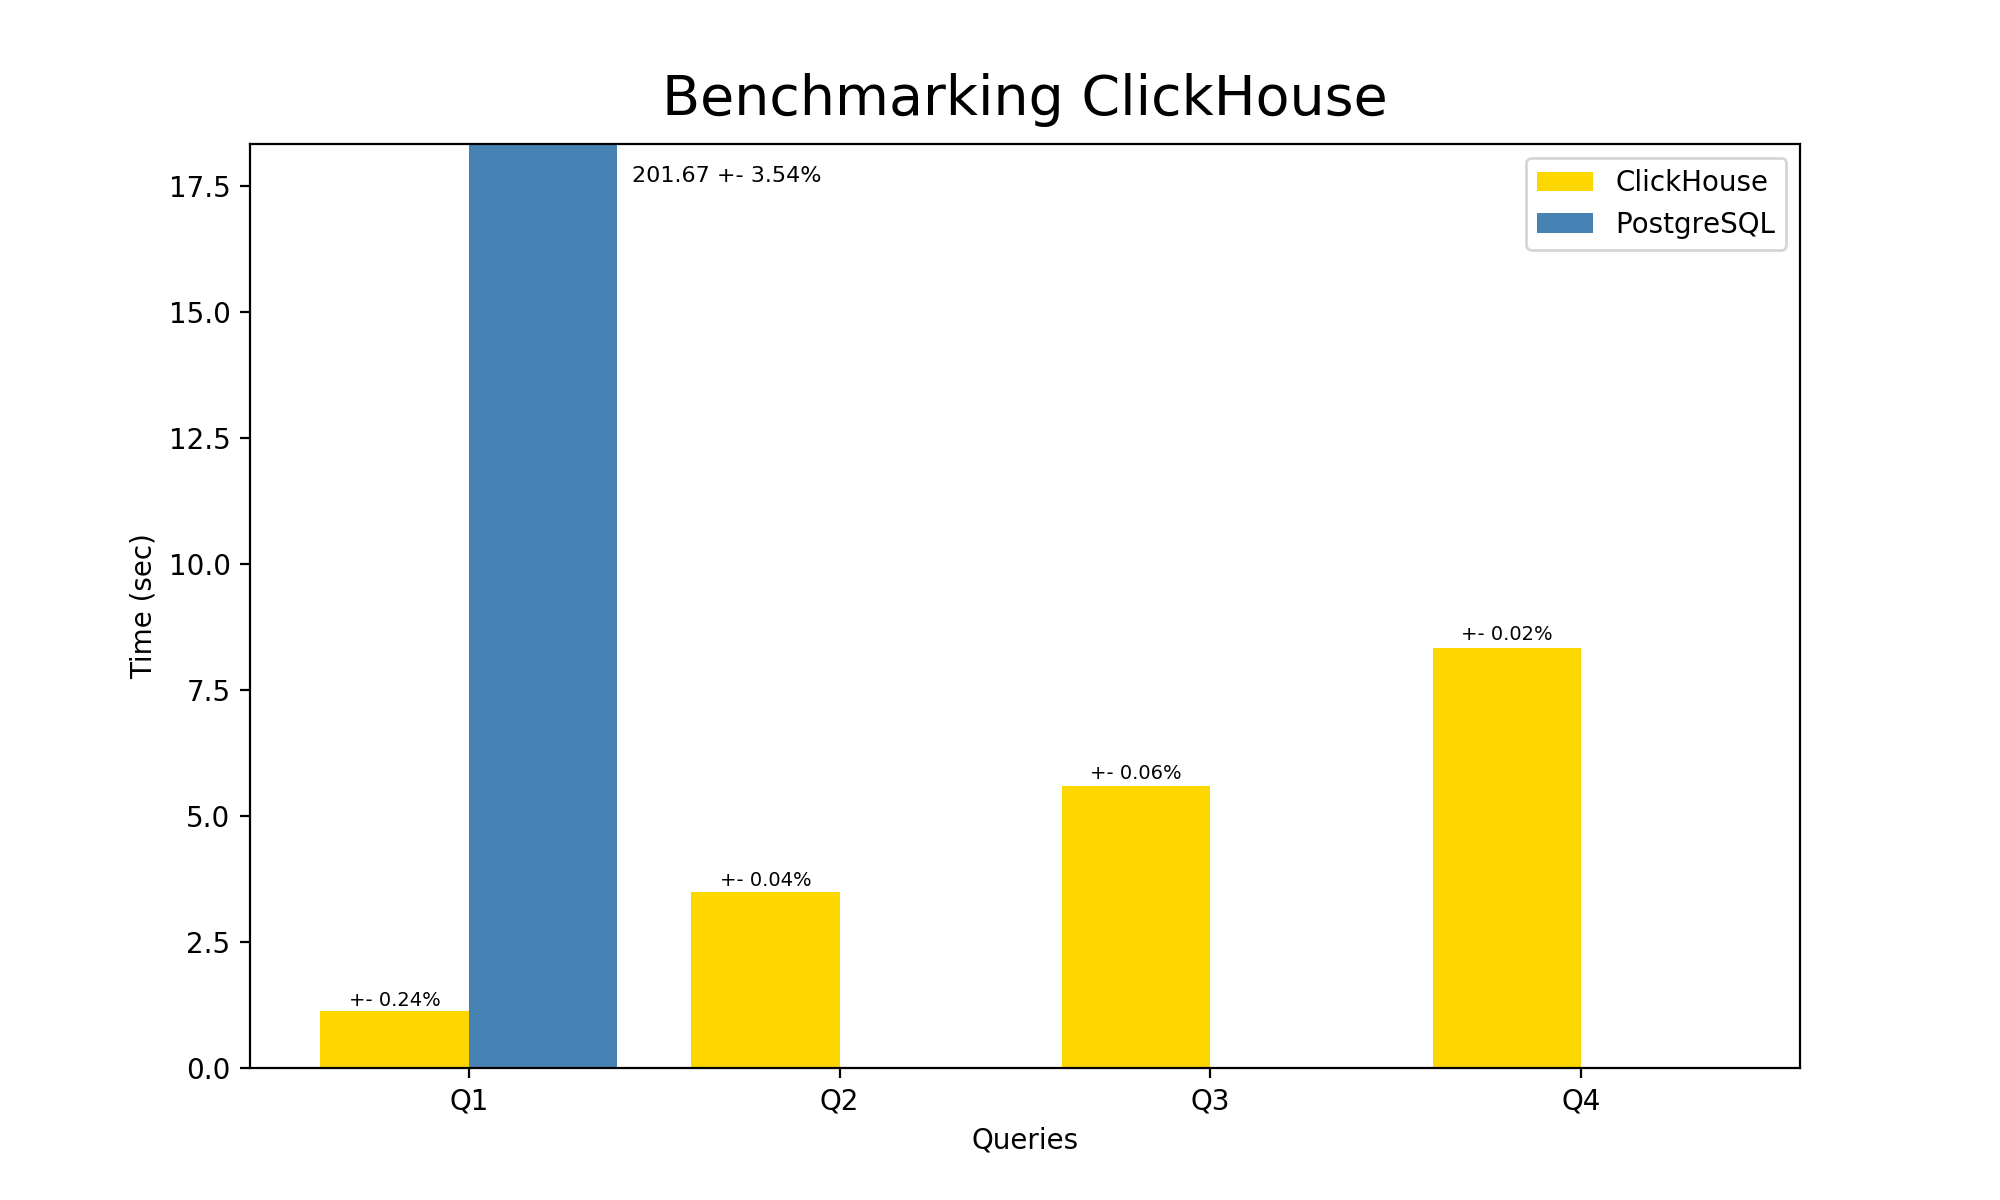

In [38]:
bartext(ch_bars, ch_stds)
ax.text(psql_bars[0].get_x() + psql_bars[0].get_width() * 1.1, 17.5, f'{psql_means[0]} +- {psql_stds[0]}', ha='left', va='bottom', fontsize=8)
plt.show()